In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('../00_DATA_preprocessed/data_tokenized_2classes.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
data

,0,1,2,3,4,5,6,7,8,9,...,72497,72498,72499,72500,72501,72502,72503,72504,72505,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['target'], axis = 1), data['target'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7915, 72506) (1979, 72506) (7915,) (1979,)


# linear svm

In [5]:
from sklearn.svm import LinearSVC
svm_model_linear = LinearSVC().fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

accuracy = svm_model_linear.score(X_test, y_test)
print("SVM accuracy: ", accuracy)

SVM accuracy:  0.9772612430520465


In [6]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, svm_predictions)
print("ROC: ", score)

ROC:  0.971828107666258


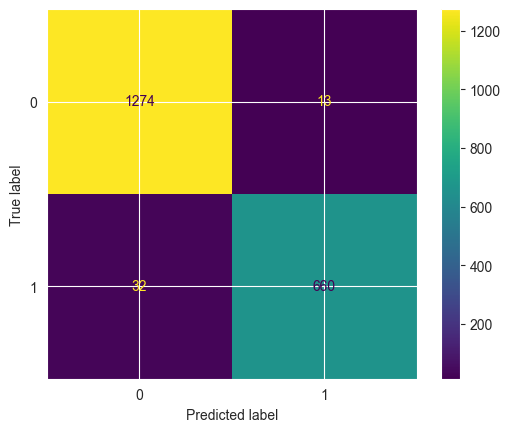

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1287
           1       0.98      0.95      0.97       692

    accuracy                           0.98      1979
   macro avg       0.98      0.97      0.97      1979
weighted avg       0.98      0.98      0.98      1979



In [9]:
svm_model_linear_weighted = LinearSVC(class_weight={0:6410/9894, 1:3484/9894}).fit(X_train, y_train)
svm_predictions_weighted = svm_model_linear_weighted.predict(X_test)

accuracy_weighted = svm_model_linear_weighted.score(X_test, y_test)
print("SVM accuracy (added weights): ", accuracy_weighted)

SVM accuracy (added weights):  0.9580596260737746


In [10]:
score = roc_auc_score(y_test, svm_predictions_weighted)
print("ROC (added weights): ", score)

ROC (added weights):  0.9406969876623057


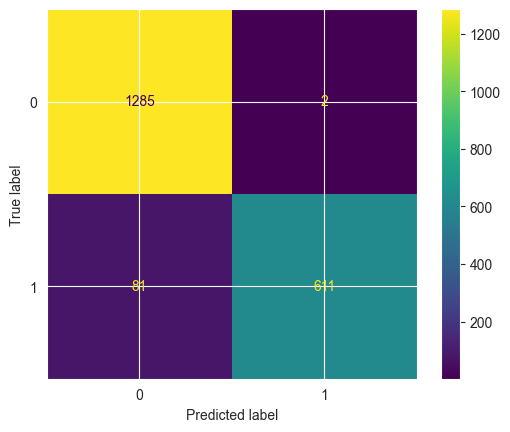

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions_weighted)

In [12]:
print(classification_report(y_test, svm_predictions_weighted))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1287
           1       1.00      0.88      0.94       692

    accuracy                           0.96      1979
   macro avg       0.97      0.94      0.95      1979
weighted avg       0.96      0.96      0.96      1979



# Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB().fit(X_train, y_train)
bayes_predictions = bayes.predict(X_test)

accuracy = bayes.score(X_test, y_test)
print("bayes accuracy: ", accuracy)

bayes accuracy:  0.8676099039919151


In [14]:
score = roc_auc_score(y_test, bayes_predictions)
print("ROC (added weights): ", score)

ROC (added weights):  0.8157042860800086


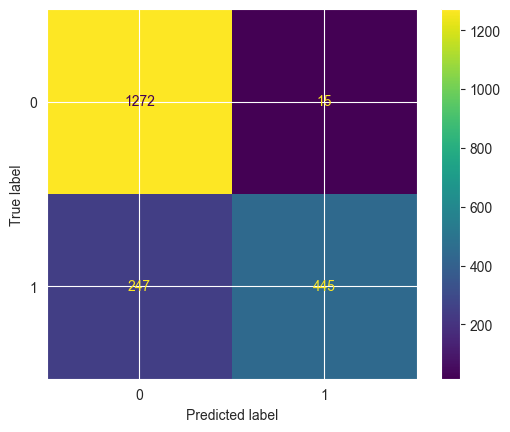

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, bayes_predictions)

In [16]:
print(classification_report(y_test, bayes_predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1287
           1       0.97      0.64      0.77       692

    accuracy                           0.87      1979
   macro avg       0.90      0.82      0.84      1979
weighted avg       0.88      0.87      0.86      1979

